In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\retail_store_inventory.csv")

In [5]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and add it as a new column
df['Year'] = df['Date'].dt.year

# Display the updated DataFrame
print(df.head())

        Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  Year  
0             Rainy                  0               29.69      Autumn  2022  
1     

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

In [11]:
df.describe()

,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Year
count,73100,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,2022-12-31 23:59:59.999999744,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077,2022.502052
min,2022-01-01 00:00:00,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000,2022.000000
25%,2022-07-02 00:00:00,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000,2022.000000
50%,2023-01-01 00:00:00,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000,2023.000000
75%,2023-07-03 00:00:00,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000,2023.000000
max,2024-01-01 00:00:00,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000,2024.000000
std,NaN,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408,0.502728


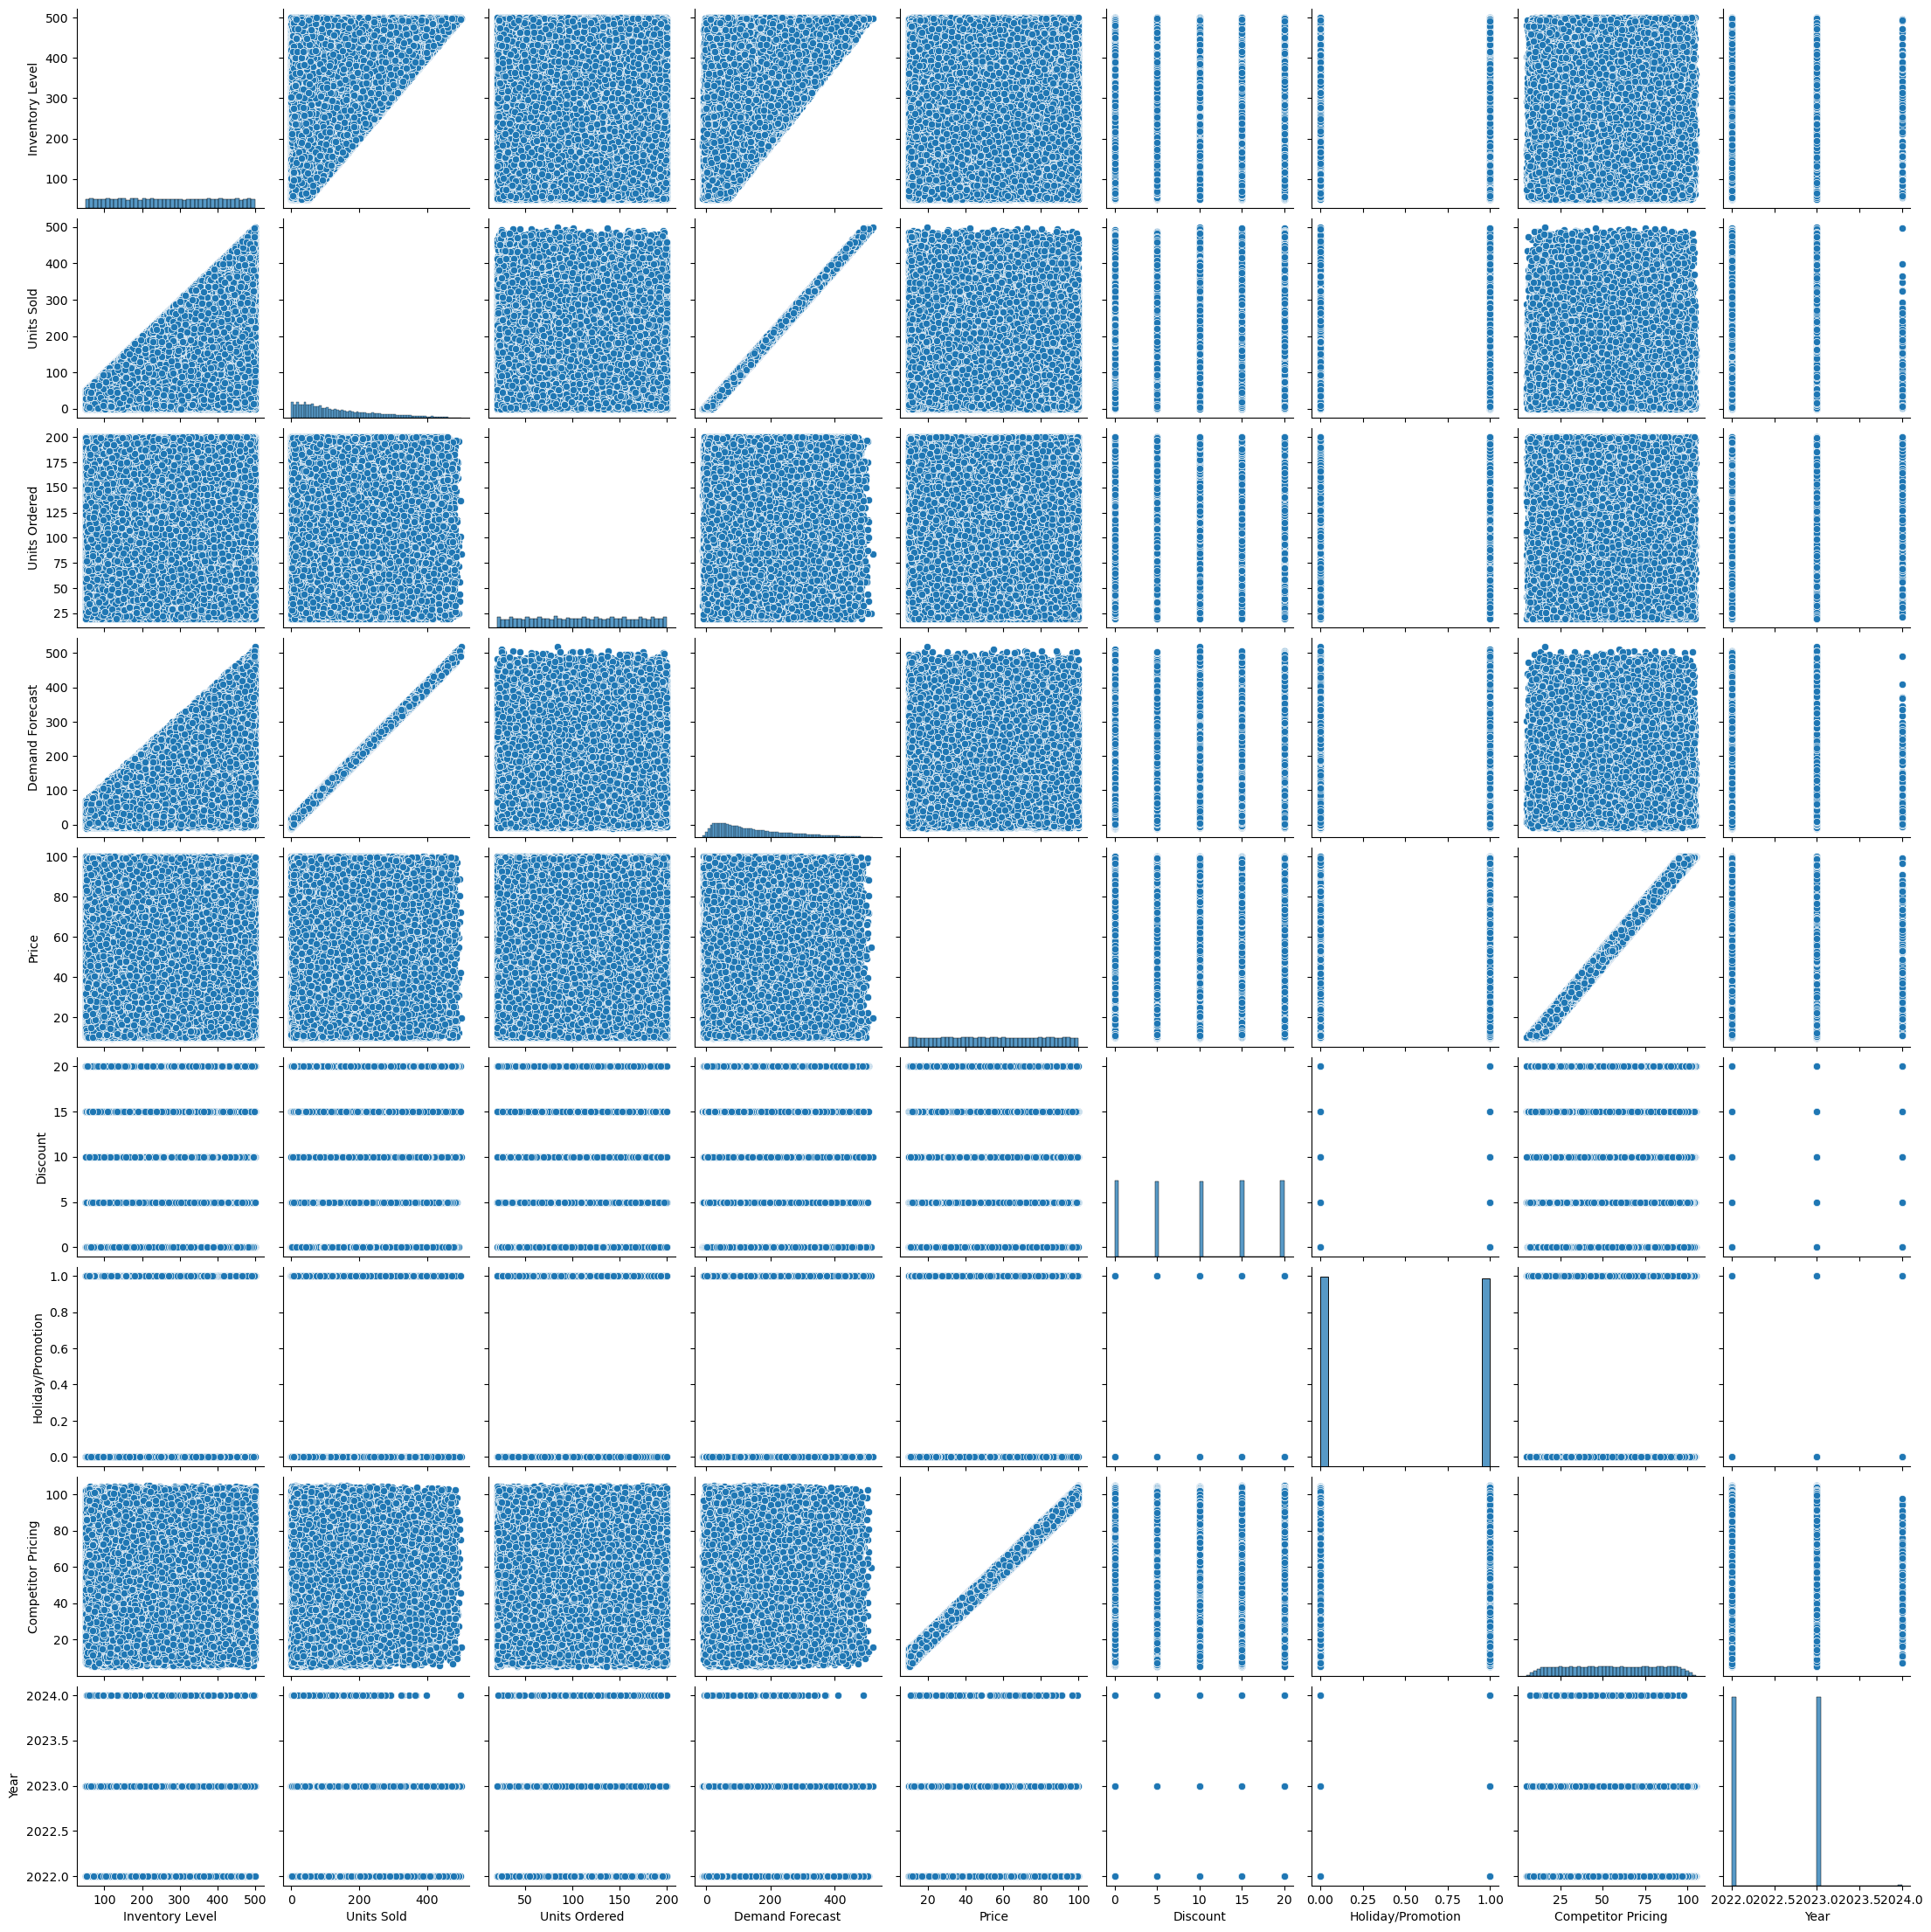

In [13]:
sns.pairplot(df)

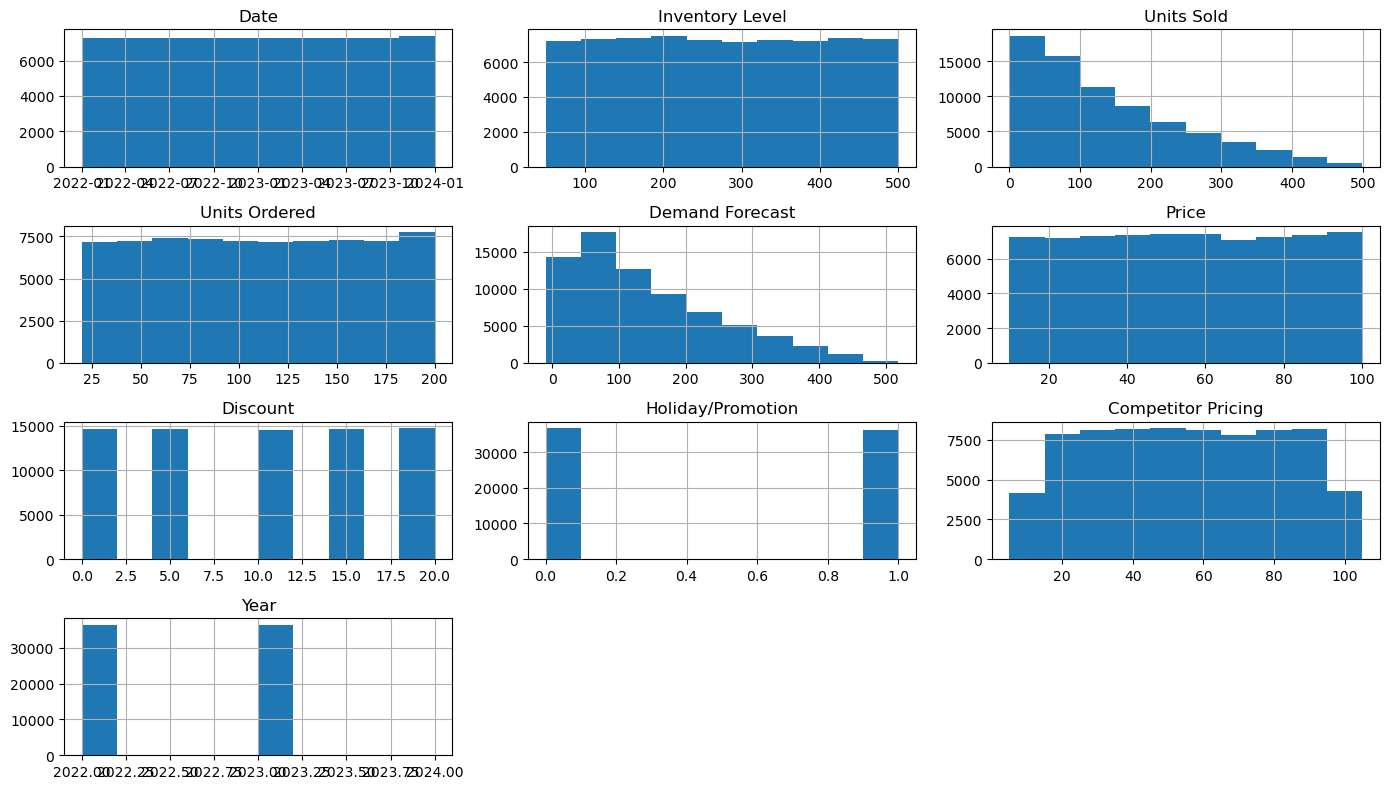

In [14]:
df.hist(figsize=(14, 8))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

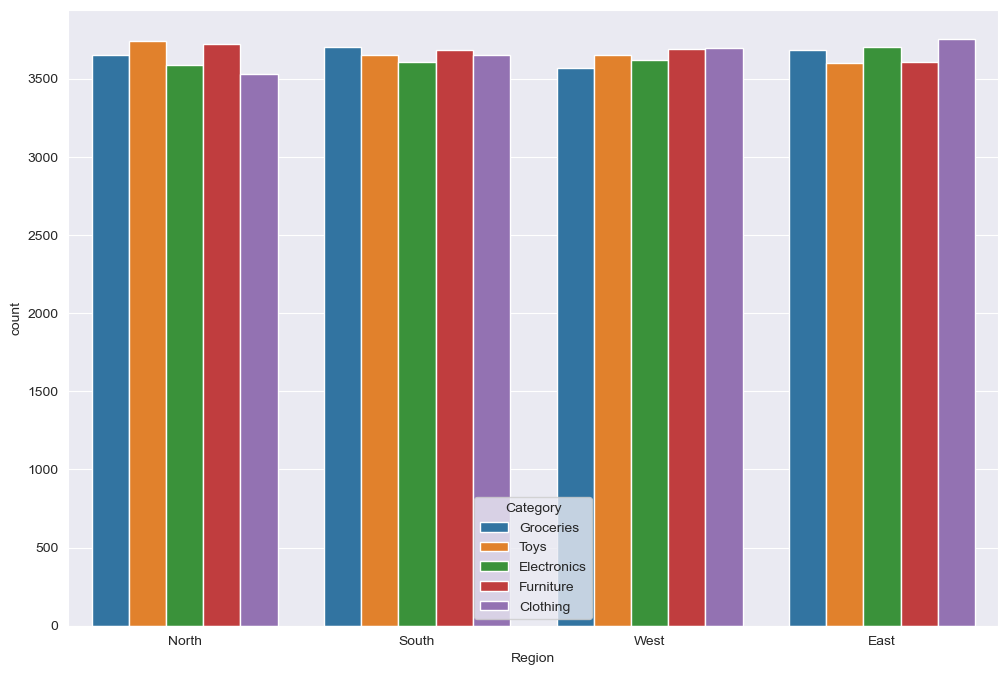

In [15]:
sns.set_style("darkgrid")
 
plt.figure(figsize=(12, 8))

 
sns.countplot(x="Region", hue="Category", data=df)

 
plt.show()

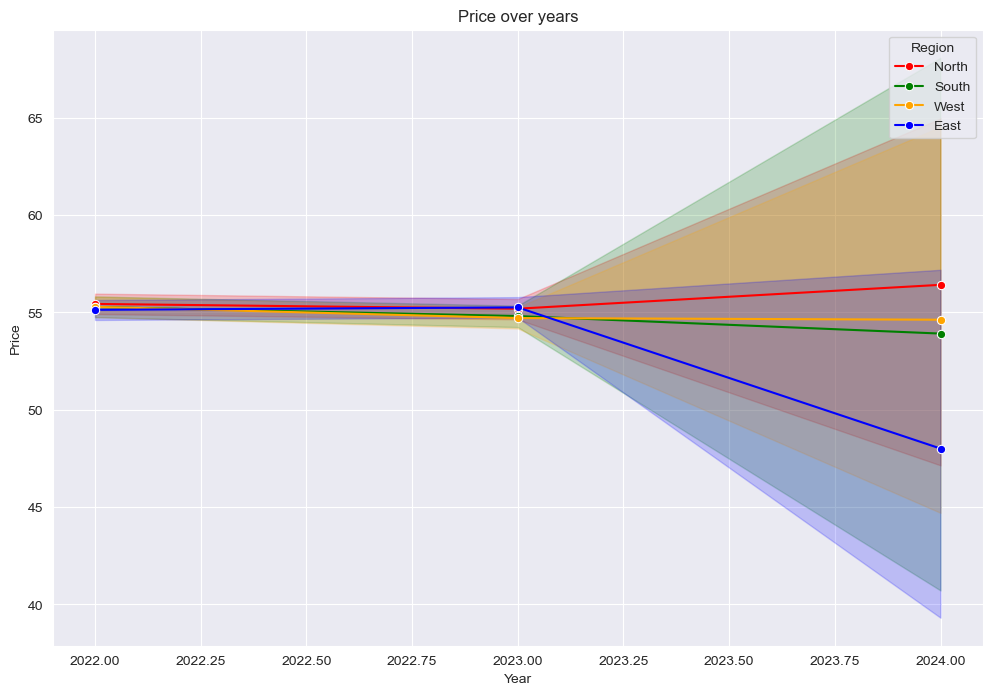

In [16]:
# Set the figure size
custom_palette = ["red", "green", "orange", "blue"]
 

sns.set_palette(custom_palette)
plt.figure(figsize=(12, 8))

# Create a line plot
sns.lineplot(
    x="Year", 
    y="Price", 
    hue="Region", 
    marker="o",  # Add markers
    data=df
)

# Add labels and a title
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price over years")

# Display the plot
plt.show()


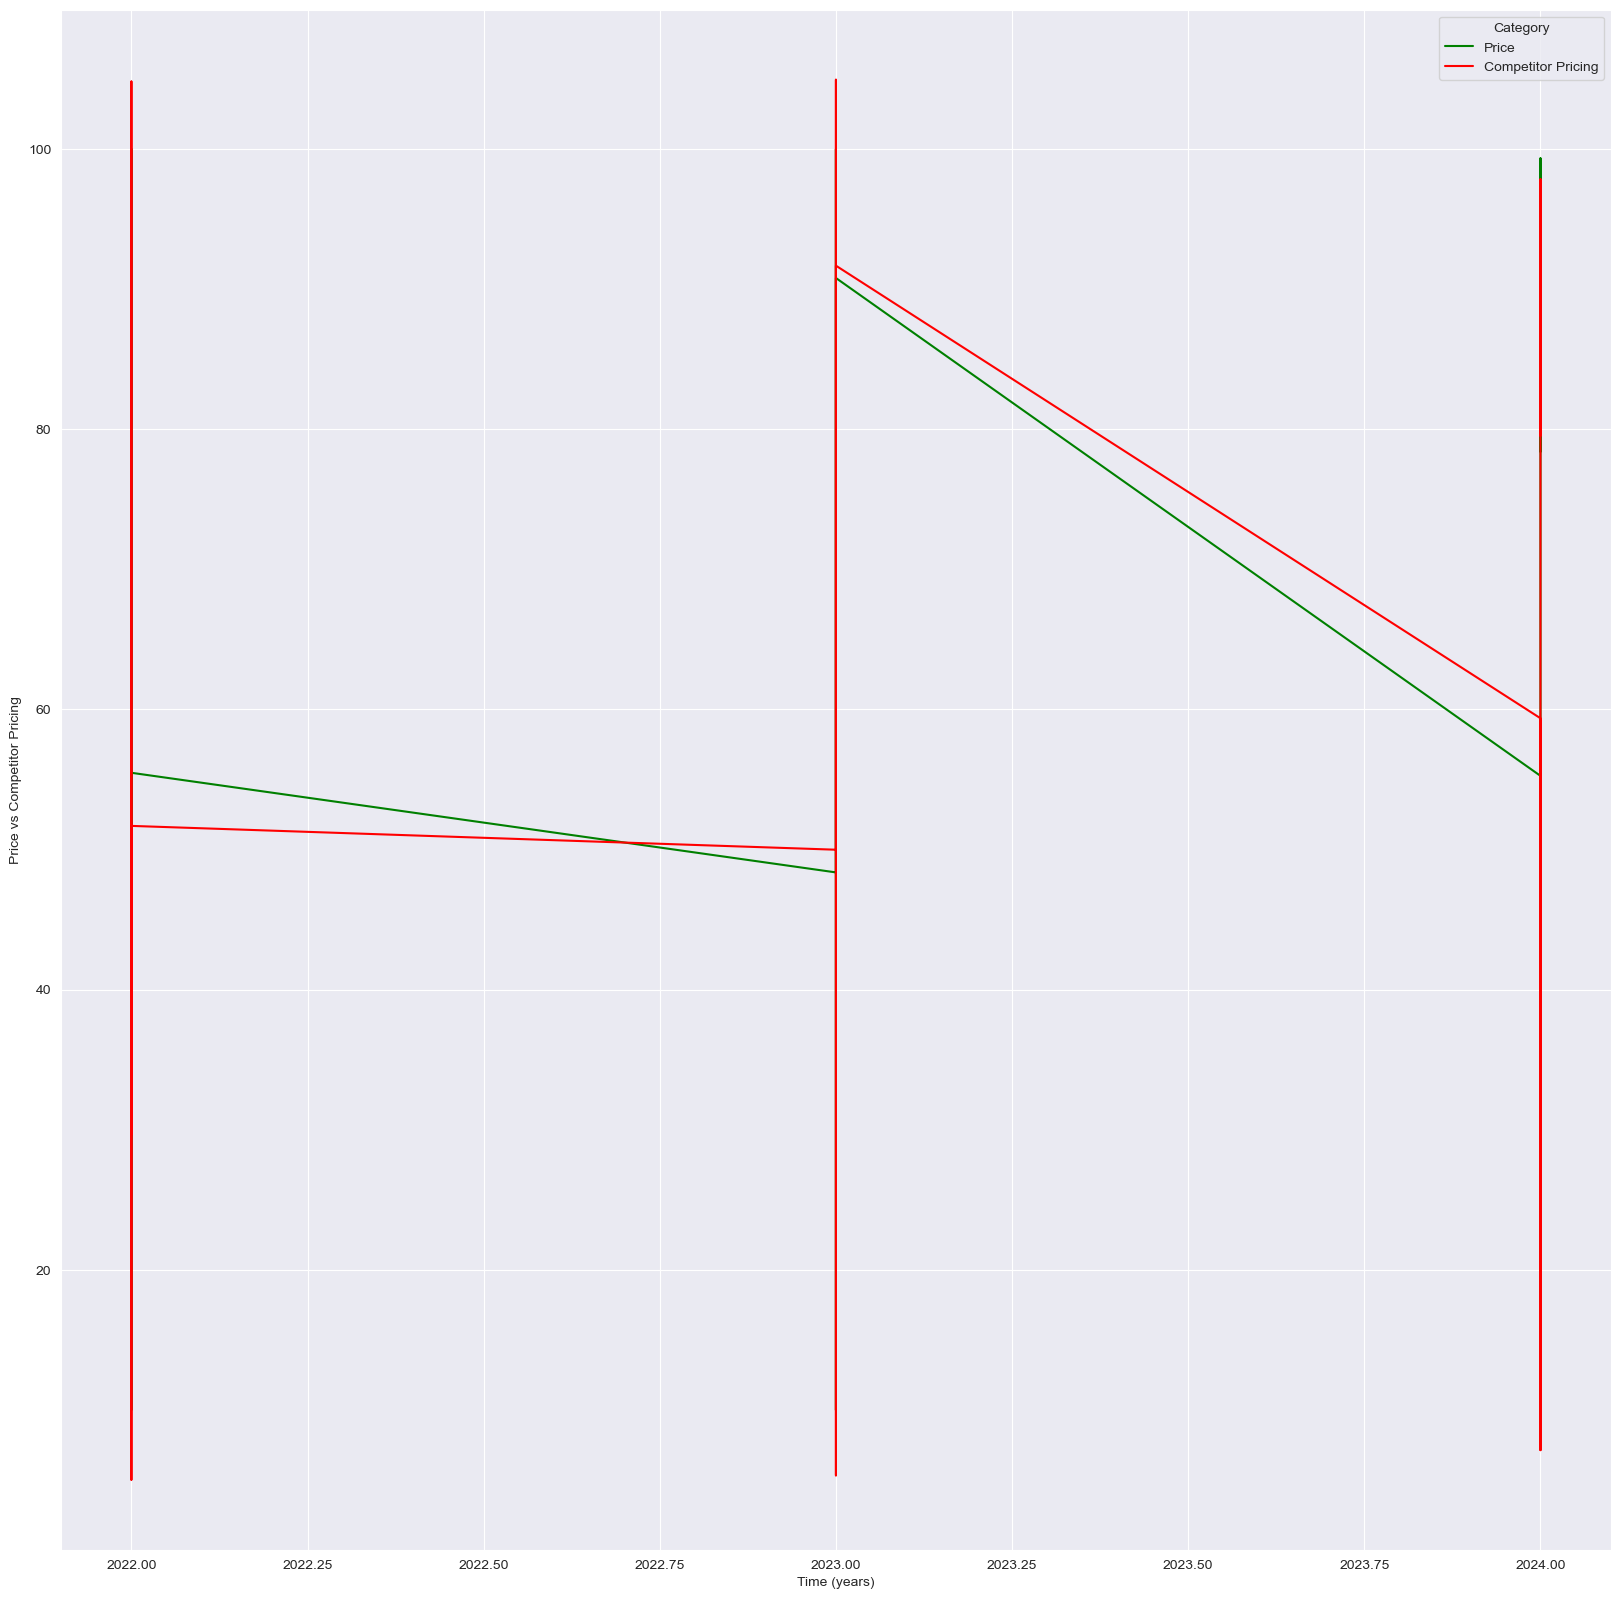

In [20]:
#simple

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(df["Year"], df["Price"], label="Price", color="green")
ax.plot(df["Year"], df["Competitor Pricing"], label="Competitor Pricing", color="red")

ax.set_xlabel("Time (years)")
ax.set_ylabel("Price vs Competitor Pricing")

plt.legend(title="Category")

plt.show()

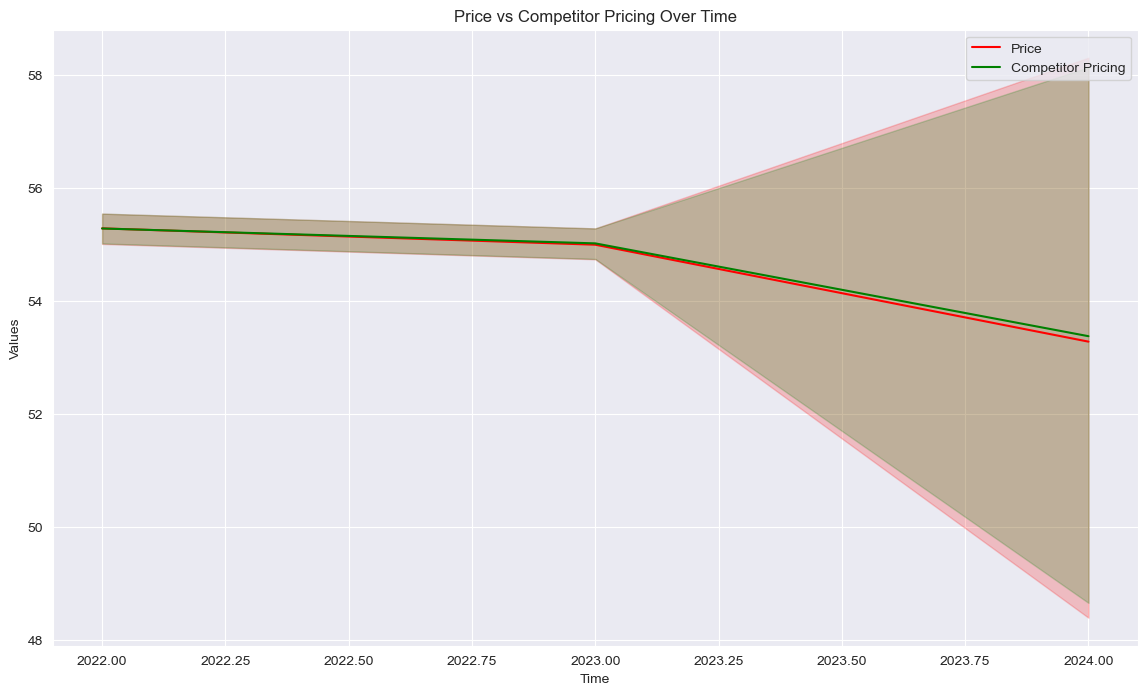

In [25]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    x="Year", 
    y="Price", 
    label="Price", 
    data=df,
    
     
)

sns.lineplot(
    x="Year", 
    y="Competitor Pricing", 
    label="Competitor Pricing", 
    data=df, 
   
)

plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Price vs Competitor Pricing Over Time")
plt.legend()

plt.show()

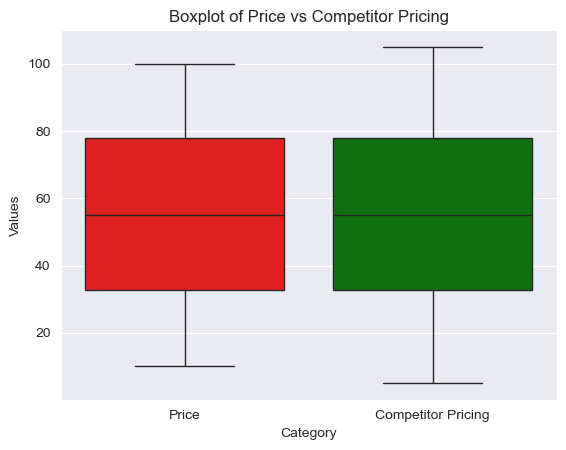

In [27]:
sns.boxplot(data=df[["Price", "Competitor Pricing"]])

plt.xlabel("Category")
plt.ylabel("Values")
plt.title("Boxplot of Price vs Competitor Pricing")

plt.show()

<Figure size 1200x600 with 0 Axes>

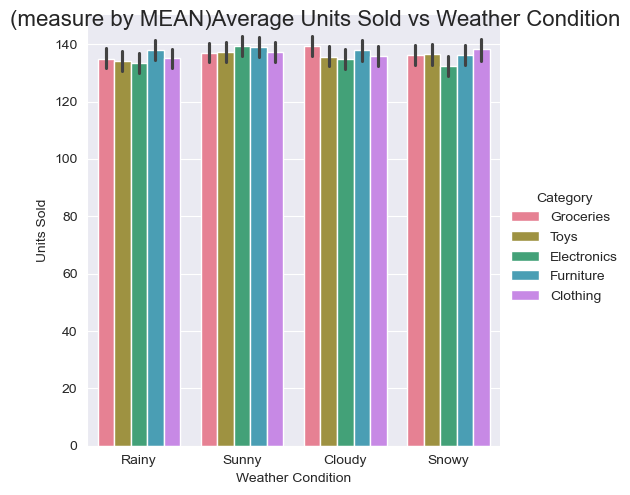

In [29]:
#measure by MEAN
plt.figure(figsize=(12, 6))

 
g = sns.catplot(
    x="Weather Condition", 
    y="Units Sold", 
    hue="Category",
    kind="bar",
    data=df
)

 
g.fig.suptitle("(measure by MEAN)Average Units Sold vs Weather Condition", fontsize=16)

 
plt.show()

<Figure size 1200x600 with 0 Axes>

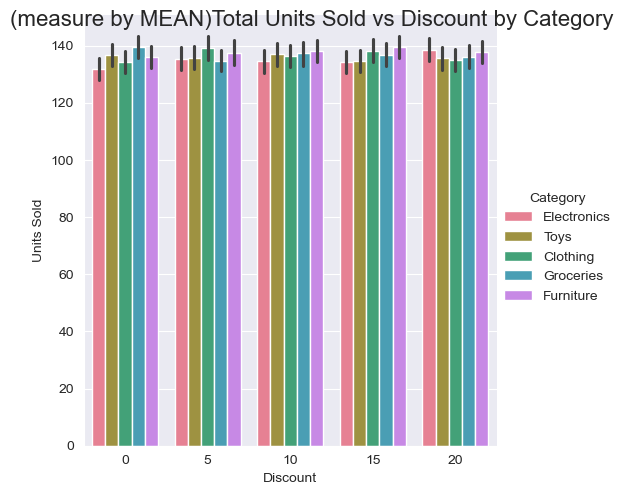

In [31]:
# Measure by MEAN
plt.figure(figsize=(12, 6))
 
g = sns.catplot(
    x="Discount", 
    y="Units Sold", 
    hue="Category", 
    kind="bar", 
    data=df
)

# Add the title for the plot
g.fig.suptitle("(measure by MEAN)Total Units Sold vs Discount by Category", fontsize=16)

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

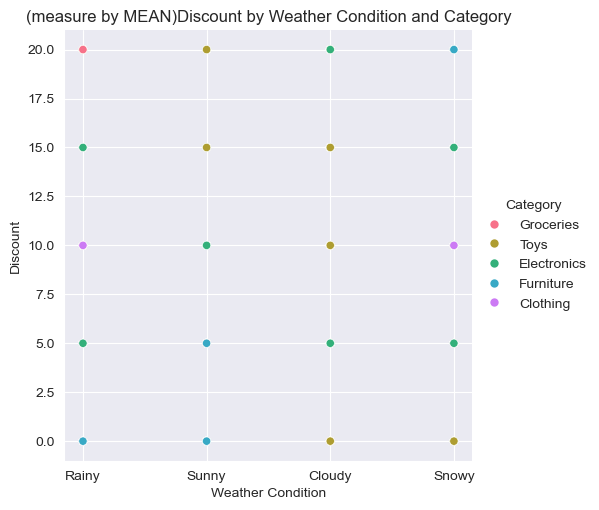

In [33]:
plt.figure(figsize=(12, 6))

sns.relplot(
    x="Weather Condition", 
    y="Discount", 
    hue="Category",
    kind="scatter",
    data=df

)

 
plt.title('(measure by MEAN)Discount by Weather Condition and Category')
plt.xlabel('Weather Condition')
plt.ylabel('Discount')

 
plt.show()

<Figure size 1200x600 with 0 Axes>

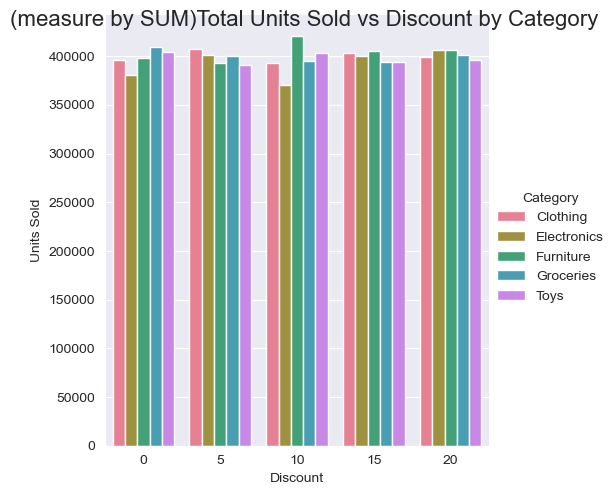

In [35]:
#measure by SUM 
import seaborn as sns
import matplotlib.pyplot as plt

 
df_sum = df.groupby(["Discount", "Category"])["Units Sold"].sum().reset_index()

plt.figure(figsize=(12, 6))

 
g = sns.catplot(
    x="Discount", 
    y="Units Sold", 
    hue="Category",
    kind="bar",
    data=df_sum
)

 
g.fig.suptitle("(measure by SUM)Total Units Sold vs Discount by Category", fontsize=16)

 
plt.show()

<Figure size 1200x600 with 0 Axes>

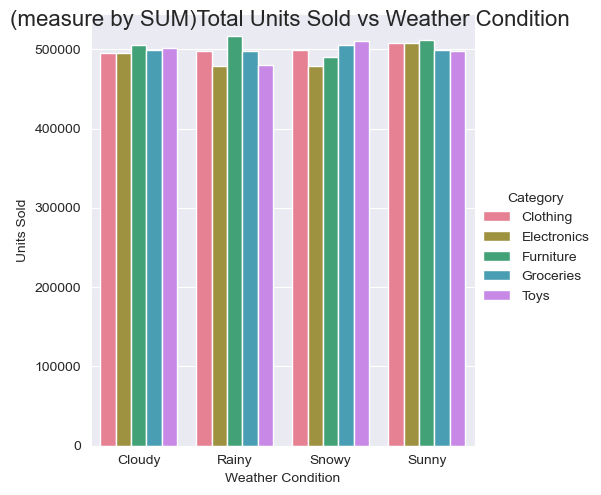

In [37]:
#measure by SUM 
df_sum2 = df.groupby(["Weather Condition", "Category"])["Units Sold"].sum().reset_index()

plt.figure(figsize=(12, 6))

 
g = sns.catplot(
    x="Weather Condition", 
    y="Units Sold", 
    hue="Category", 
    kind="bar", 
    data=df_sum2
)

 
g.fig.suptitle("(measure by SUM)Total Units Sold vs Weather Condition", fontsize=16)

 
plt.show()

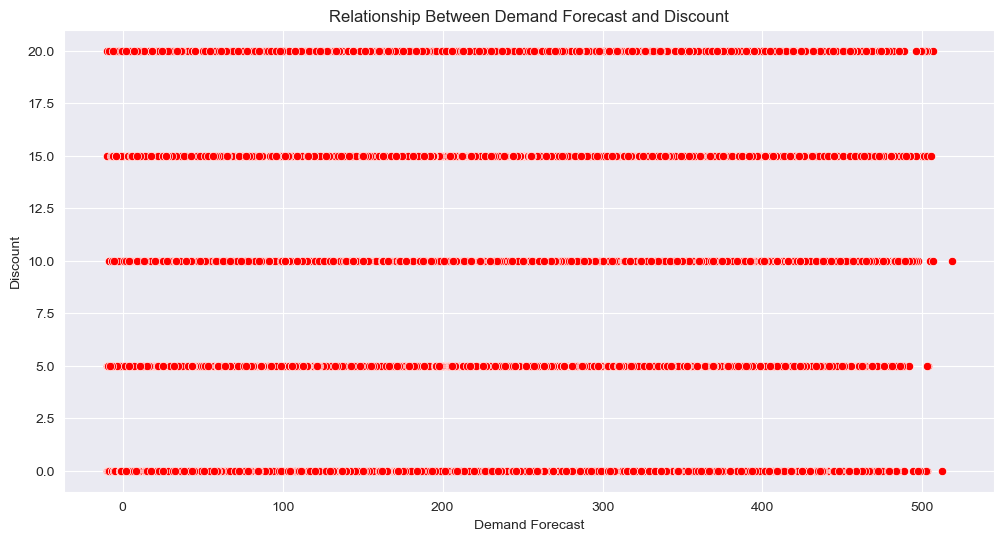

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Demand Forecast", y="Discount", data=df)

plt.title("Relationship Between Demand Forecast and Discount")
plt.xlabel("Demand Forecast")
plt.ylabel("Discount")
plt.show()

In [41]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,2022
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,2022
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,2022
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,2022
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,2022


In [43]:
dftocorr=df
Lbl = LabelEncoder()
columns_to_encode = ["Seasonality", "Weather Condition", "Region", "Category"]
dftocorr[columns_to_encode] = dftocorr[columns_to_encode].apply(Lbl.fit_transform)
dftocorr

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year
0,2022-01-01,S001,P0001,3,1,231,127,55,135.47,33.50,20,1,0,29.69,0,2022
1,2022-01-01,S001,P0002,4,2,204,150,66,144.04,63.01,20,3,0,66.16,0,2022
2,2022-01-01,S001,P0003,4,3,102,65,51,74.02,27.99,10,3,1,31.32,2,2022
3,2022-01-01,S001,P0004,4,1,469,61,164,62.18,32.72,10,0,1,34.74,0,2022
4,2022-01-01,S001,P0005,1,0,166,14,135,9.26,73.64,0,3,0,68.95,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,2,0,96,8,127,18.46,73.73,20,2,0,72.45,3,2024
73096,2024-01-01,S005,P0017,4,1,313,51,101,48.43,82.57,10,0,0,83.78,0,2024
73097,2024-01-01,S005,P0018,0,3,278,36,151,39.65,11.11,10,1,0,10.91,3,2024
73098,2024-01-01,S005,P0019,4,0,374,264,21,270.52,53.14,20,1,0,55.80,1,2024


In [45]:
dftocorr=dftocorr.drop(["Date", "Store ID", "Product ID"], axis=1)

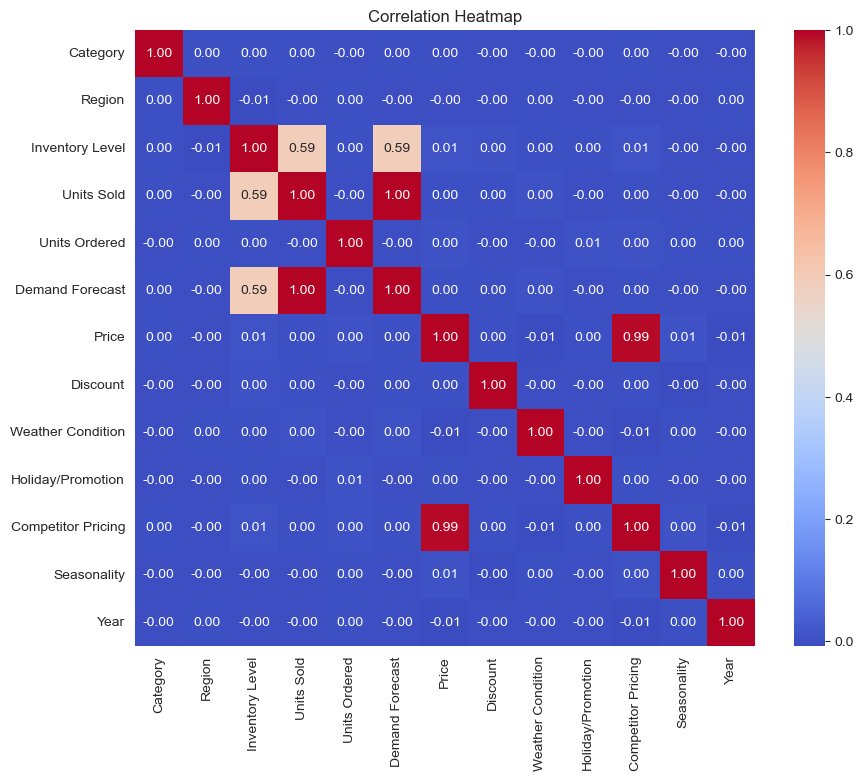

In [47]:
corr_matrix = dftocorr.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

 
plt.title("Correlation Heatmap")
plt.show()

In [49]:
X=dftocorr.drop("Demand Forecast",axis=1)
y=dftocorr["Demand Forecast"]

In [51]:
X_selected=dftocorr[["Units Sold","Inventory Level","Units Ordered"]]

In [53]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_selected = scaler.fit_transform(X_selected)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.10, random_state=44, shuffle =True)

In [57]:
reg_moduel=RandomForestRegressor(n_estimators=50,random_state=44)
reg_moduel.fit(X_train,y_train)
print("train score ", reg_moduel.score(X_train,y_train))
print("test score ", reg_moduel.score(X_test,y_test))

train score  0.9989295073498908
test score  0.9926833881559067


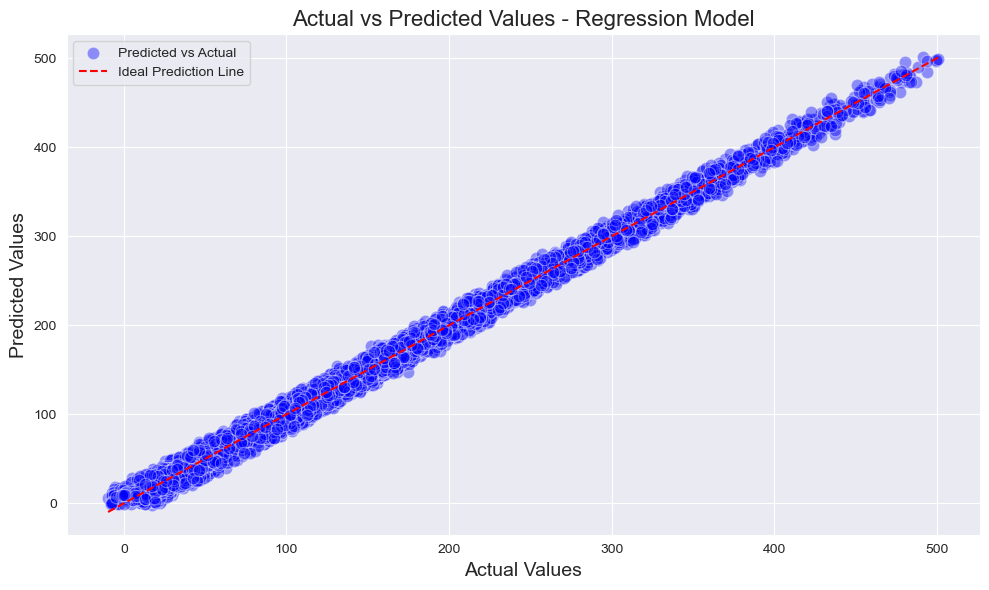

In [59]:
import seaborn as sns
 

# Make predictions
y_pred = reg_moduel.predict(X_test)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Scatter plot for Actual vs Predicted values
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.4, s=80, label='Predicted vs Actual')

# Plot the ideal line where predicted = actual
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

# Add labels, title, and grid
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values - Regression Model', fontsize=16)
plt.legend()

# Add grid for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [61]:
X2=dftocorr[["Demand Forecast","Competitor Pricing","Discount"]]
y2=dftocorr["Price"]

In [63]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X2 = scaler.fit_transform(X2)

In [65]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.10, random_state=44, shuffle =True)

In [67]:
reg_moduel2=RandomForestRegressor(n_estimators=10,random_state=44)
reg_moduel2.fit(X_train2,y_train2)
print("train score ", reg_moduel2.score(X_train2,y_train2))
print("test score ", reg_moduel2.score(X_test2,y_test2))

train score  0.9975090775058002
test score  0.9855508940039448


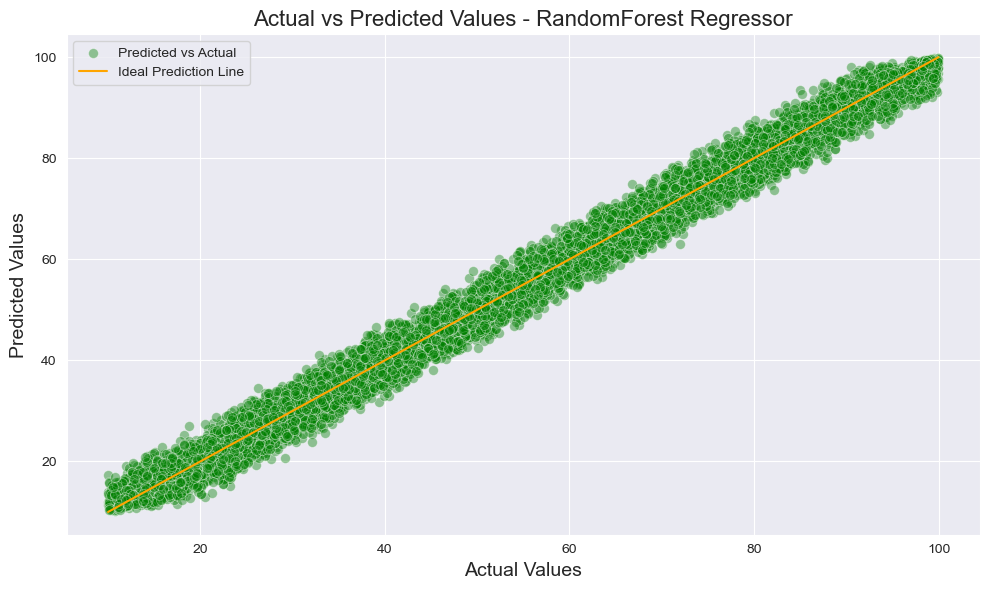

In [69]:
# Get predictions
y_pred2 = reg_moduel2.predict(X_test2)
 

# Set up the figure size
plt.figure(figsize=(10, 6))

# Scatter plot for Actual vs Predicted values with new color
sns.scatterplot(x=y_test2, y=y_pred2, color='green', alpha=0.4, s=50, label='Predicted vs Actual')

# Plot the ideal line where predicted = actual
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='orange', linestyle='-', label='Ideal Prediction Line')

# Add labels, title, and grid
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values - RandomForest Regressor', fontsize=16)
plt.legend()

# Add grid for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()